# task-1 Data Cleaning

In [ ]:
#importing important libraries
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
import seaborn as sn
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
from sklearn.decomposition import PCA

%matplotlib inline 
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import files 
  
  
uploaded = files.upload()

Saving Kaggle_Salary.csv to Kaggle_Salary.csv


In [ ]:
df=pd.read_csv('Kaggle_Salary.csv')
df.head()

,Time from Start to Finish (seconds),Q1,Q2,Q2_OTHER_TEXT,Q3,Q4,Q5,Q5_OTHER_TEXT,Q6,Q7,Q8,Q9_Part_1,Q9_Part_2,Q9_Part_3,Q9_Part_4,Q9_Part_5,Q9_Part_6,Q9_Part_7,Q9_Part_8,Q9_OTHER_TEXT,Q10,Q11,Q12_Part_1,Q12_Part_2,Q12_Part_3,Q12_Part_4,Q12_Part_5,Q12_Part_6,Q12_Part_7,Q12_Part_8,Q12_Part_9,Q12_Part_10,Q12_Part_11,Q12_Part_12,Q12_OTHER_TEXT,Q13_Part_1,Q13_Part_2,Q13_Part_3,Q13_Part_4,Q13_Part_5,...,Q32_Part_2,Q32_Part_3,Q32_Part_4,Q32_Part_5,Q32_Part_6,Q32_Part_7,Q32_Part_8,Q32_Part_9,Q32_Part_10,Q32_Part_11,Q32_Part_12,Q32_OTHER_TEXT,Q33_Part_1,Q33_Part_2,Q33_Part_3,Q33_Part_4,Q33_Part_5,Q33_Part_6,Q33_Part_7,Q33_Part_8,Q33_Part_9,Q33_Part_10,Q33_Part_11,Q33_Part_12,Q33_OTHER_TEXT,Q34_Part_1,Q34_Part_2,Q34_Part_3,Q34_Part_4,Q34_Part_5,Q34_Part_6,Q34_Part_7,Q34_Part_8,Q34_Part_9,Q34_Part_10,Q34_Part_11,Q34_Part_12,Q34_OTHER_TEXT,Q10_Encoded,Q10_buckets
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,What is your gender? - Prefer to self-describe...,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,Select the title most similar to your current ...,What is the size of the company where you are ...,Approximately how many individuals are respons...,Does your current employer incorporate machine...,Select any activities that make up an importan...,Select any activities that make up an importan...,Select any activities that make up an importan...,Select any activities that make up an importan...,Select any activities that make up an importan...,Select any activities that make up an importan...,Select any activities that make up an importan...,Select any activities that make up an importan...,Select any activities that make up an importan...,What is your current yearly compensation (appr...,Approximately how much money have you spent on...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,...,Which of the following machine learning produc...,Which of the following machine learning produc...,Which of the following machine learning produc...,Which of the following machine learning produc...,Which of the following machine learning produc...,Which of the following machine learning produc...,Which of the following machine learning produc...,Which of the following machine learning produc...,Which of the following machine learning produc...,Which of the following machine learning produc...,Which of the following machine learning produc...,Which of the following machine learning produc...,Which automated machine learning tools (or par...,Which automated machine learning tools (or par...,Which automated machine learning tools (or par...,Which automated machine learning tools (or par...,Which automated machine learning tools (or par...,Which automated machine learning tools (or par...,Which automated machine learning tools (or par...,Which automated machine learning tools (or par...,Which automated machine learning tools (or par...,Which automated machine learning tools (or par...,Which automated machine learning tools (or par...,Which automated machine learning tools (or par...,

In [ ]:
#checking whether any value missing or not
df.isnull().sum()

Time from Start to Finish (seconds)        0
Q1                                         0
Q2                                         0
Q2_OTHER_TEXT                              0
Q3                                         0
                                       ...  
Q34_Part_11                            11252
Q34_Part_12                            12210
Q34_OTHER_TEXT                             0
Q10_Encoded                                1
Q10_buckets                                1
Length: 248, dtype: int64

### the 'OTHER_TEXT' features removed from the columns

In [ ]:
#Removing the columns containing random values(-1) in it
othertext_features=[]
for cols in df.columns:
    if 'OTHER_TEXT' in cols:
        othertext_features.append(cols)
        

In [ ]:
df.drop(df[othertext_features], axis= 'columns', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12498 entries, 0 to 12497
Columns: 225 entries, Time from Start to Finish (seconds) to Q10_buckets
dtypes: float64(1), object(224)
memory usage: 21.5+ MB


In [ ]:
print(df.columns.values)

['Time from Start to Finish (seconds)' 'Q1' 'Q2' 'Q3' 'Q4' 'Q5' 'Q6' 'Q7'
 'Q8' 'Q9_Part_1' 'Q9_Part_2' 'Q9_Part_3' 'Q9_Part_4' 'Q9_Part_5'
 'Q9_Part_6' 'Q9_Part_7' 'Q9_Part_8' 'Q10' 'Q11' 'Q12_Part_1' 'Q12_Part_2'
 'Q12_Part_3' 'Q12_Part_4' 'Q12_Part_5' 'Q12_Part_6' 'Q12_Part_7'
 'Q12_Part_8' 'Q12_Part_9' 'Q12_Part_10' 'Q12_Part_11' 'Q12_Part_12'
 'Q13_Part_1' 'Q13_Part_2' 'Q13_Part_3' 'Q13_Part_4' 'Q13_Part_5'
 'Q13_Part_6' 'Q13_Part_7' 'Q13_Part_8' 'Q13_Part_9' 'Q13_Part_10'
 'Q13_Part_11' 'Q13_Part_12' 'Q14' 'Q14_Part_1_TEXT' 'Q14_Part_2_TEXT'
 'Q14_Part_3_TEXT' 'Q14_Part_4_TEXT' 'Q14_Part_5_TEXT' 'Q15' 'Q16_Part_1'
 'Q16_Part_2' 'Q16_Part_3' 'Q16_Part_4' 'Q16_Part_5' 'Q16_Part_6'
 'Q16_Part_7' 'Q16_Part_8' 'Q16_Part_9' 'Q16_Part_10' 'Q16_Part_11'
 'Q16_Part_12' 'Q17_Part_1' 'Q17_Part_2' 'Q17_Part_3' 'Q17_Part_4'
 'Q17_Part_5' 'Q17_Part_6' 'Q17_Part_7' 'Q17_Part_8' 'Q17_Part_9'
 'Q17_Part_10' 'Q17_Part_11' 'Q17_Part_12' 'Q18_Part_1' 'Q18_Part_2'
 'Q18_Part_3' 'Q18_Part_4' 'Q18_Part

## Removing other columns having '_TEXT' features in it

In [ ]:
text_features=[]
for cols in df.columns:
    if '_TEXT' in cols:
        text_features.append(cols)
        
df.drop(df[text_features], axis= 'columns', inplace=True)
df.info()
        

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12498 entries, 0 to 12497
Columns: 220 entries, Time from Start to Finish (seconds) to Q10_buckets
dtypes: float64(1), object(219)
memory usage: 21.0+ MB


## Dropping the column of duration required to fill the survey as it is not relevant to salary prediction

In [ ]:
df.head()

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9_Part_1,Q9_Part_2,Q9_Part_3,Q9_Part_4,Q9_Part_5,Q9_Part_6,Q9_Part_7,Q9_Part_8,Q10,Q11,Q12_Part_1,Q12_Part_2,Q12_Part_3,Q12_Part_4,Q12_Part_5,Q12_Part_6,Q12_Part_7,Q12_Part_8,Q12_Part_9,Q12_Part_10,Q12_Part_11,Q12_Part_12,Q13_Part_1,Q13_Part_2,Q13_Part_3,Q13_Part_4,Q13_Part_5,Q13_Part_6,Q13_Part_7,Q13_Part_8,Q13_Part_9,...,Q31_Part_11,Q31_Part_12,Q32_Part_1,Q32_Part_2,Q32_Part_3,Q32_Part_4,Q32_Part_5,Q32_Part_6,Q32_Part_7,Q32_Part_8,Q32_Part_9,Q32_Part_10,Q32_Part_11,Q32_Part_12,Q33_Part_1,Q33_Part_2,Q33_Part_3,Q33_Part_4,Q33_Part_5,Q33_Part_6,Q33_Part_7,Q33_Part_8,Q33_Part_9,Q33_Part_10,Q33_Part_11,Q33_Part_12,Q34_Part_1,Q34_Part_2,Q34_Part_3,Q34_Part_4,Q34_Part_5,Q34_Part_6,Q34_Part_7,Q34_Part_8,Q34_Part_9,Q34_Part_10,Q34_Part_11,Q34_Part_12,Q10_Encoded,Q10_buckets
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,What is the size of the company where you are ...,Approximately how many individuals are respons...,Does your current employer incorporate machine...,Select any activities that make up an importan...,Select any activities that make up an importan...,Select any activities that make up an importan...,Select any activities that make up an importan...,Select any activities that make up an importan...,Select any activities that make up an importan...,Select any activities that make up an importan...,Select any activities that make up an importan...,What is your current yearly compensation (appr...,Approximately how much money have you spent on...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,...,Which specific big data / analytics products d...,Which specific big data / analytics products d...,Which of the following machine learning produc...,Which of the following machine learning produc...,Which of the following machine learning produc...,Which of the following machine learning produc...,Which of the following machine learning produc...,Which of the following machine learning produc...,Which of the following machine learning produc...,Which of the following machine learning produc...,Which of the following machine learning produc...,Which of the following machine learning produc...,Which of the following machine learning produc...,Which of the following machine learning produc...,Which automated machine learning tools (or par...,Which automated machine learning tools (or par...,Which automated machine learning tools (or par...,Which automated machine learning tools (or par...,Which automated machine learning tools (or par...,Which automated machine learning tools (or par...,Which automated machine learning tools (or par...,Which automated machine learning tools (or par...,Which automated machine learning tools (or par...,Which automated machine learning tools (or par...,Which automated machine

In [ ]:
df.drop(['Time from Start to Finish (seconds)'], axis= 'columns', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12498 entries, 0 to 12497
Columns: 219 entries, Q1 to Q10_buckets
dtypes: float64(1), object(218)
memory usage: 20.9+ MB


## Renaming the last two columns of the first row as "salaryencode" and "buckets"

In [ ]:
df.iloc[0,-1] = 'buckets'
df.iloc[0,-2] = 'salaryencode'
df.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9_Part_1,Q9_Part_2,Q9_Part_3,Q9_Part_4,Q9_Part_5,Q9_Part_6,Q9_Part_7,Q9_Part_8,Q10,Q11,Q12_Part_1,Q12_Part_2,Q12_Part_3,Q12_Part_4,Q12_Part_5,Q12_Part_6,Q12_Part_7,Q12_Part_8,Q12_Part_9,Q12_Part_10,Q12_Part_11,Q12_Part_12,Q13_Part_1,Q13_Part_2,Q13_Part_3,Q13_Part_4,Q13_Part_5,Q13_Part_6,Q13_Part_7,Q13_Part_8,Q13_Part_9,Q13_Part_10,...,Q31_Part_11,Q31_Part_12,Q32_Part_1,Q32_Part_2,Q32_Part_3,Q32_Part_4,Q32_Part_5,Q32_Part_6,Q32_Part_7,Q32_Part_8,Q32_Part_9,Q32_Part_10,Q32_Part_11,Q32_Part_12,Q33_Part_1,Q33_Part_2,Q33_Part_3,Q33_Part_4,Q33_Part_5,Q33_Part_6,Q33_Part_7,Q33_Part_8,Q33_Part_9,Q33_Part_10,Q33_Part_11,Q33_Part_12,Q34_Part_1,Q34_Part_2,Q34_Part_3,Q34_Part_4,Q34_Part_5,Q34_Part_6,Q34_Part_7,Q34_Part_8,Q34_Part_9,Q34_Part_10,Q34_Part_11,Q34_Part_12,Q10_Encoded,Q10_buckets
0,What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,What is the size of the company where you are ...,Approximately how many individuals are respons...,Does your current employer incorporate machine...,Select any activities that make up an importan...,Select any activities that make up an importan...,Select any activities that make up an importan...,Select any activities that make up an importan...,Select any activities that make up an importan...,Select any activities that make up an importan...,Select any activities that make up an importan...,Select any activities that make up an importan...,What is your current yearly compensation (appr...,Approximately how much money have you spent on...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,...,Which specific big data / analytics products d...,Which specific big data / analytics products d...,Which of the following machine learning produc...,Which of the following machine learning produc...,Which of the following machine learning produc...,Which of the following machine learning produc...,Which of the following machine learning produc...,Which of the following machine learning produc...,Which of the following machine learning produc...,Which of the following machine learning produc...,Which of the following machine learning produc...,Which of the following machine learning produc...,Which of the following machine learning produc...,Which of the following machine learning produc...,Which automated machine learning tools (or par...,Which automated machine learning tools (or par...,Which automated machine learning tools (or par...,Which automated machine learning tools (or par...,Which automated machine learning tools (or par...,Which automated machine learning tools (or par...,Which automated machine learning tools (or par...,Which automated machine learning tools (or par...,Which automated machine learning tools (or par...,Which automated machine learning tools (or par...,Which automated mac

In [ ]:
df.columns = df.iloc[0]
df.head()

,What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education that you have attained or plan to attain within the next 2 years?,Select the title most similar to your current role (or most recent title if retired): - Selected Choice,What is the size of the company where you are employed?,Approximately how many individuals are responsible for data science workloads at your place of business?,Does your current employer incorporate machine learning methods into their business?,Select any activities that make up an important part of your role at work: (Select all that apply) - Selected Choice - Analyze and understand data to influence product or business decisions,"Select any activities that make up an important part of your role at work: (Select all that apply) - Selected Choice - Build and/or run the data infrastructure that my business uses for storing, analyzing, and operationalizing data",Select any activities that make up an important part of your role at work: (Select all that apply) - Selected Choice - Build prototypes to explore applying machine learning to new areas,Select any activities that make up an important part of your role at work: (Select all that apply) - Selected Choice - Build and/or run a machine learning service that operationally improves my product or workflows,Select any activities that make up an important part of your role at work: (Select all that apply) - Selected Choice - Experimentation and iteration to improve existing ML models,Select any activities that make up an important part of your role at work: (Select all that apply) - Selected Choice - Do research that advances the state of the art of machine learning,Select any activities that make up an important part of your role at work: (Select all that apply) - Selected Choice - None of these activities are an important part of my role at work,Select any activities that make up an important part of your role at work: (Select all that apply) - Selected Choice - Other,What is your current yearly compensation (approximate $USD)?,Approximately how much money have you spent on machine learning and/or cloud computing products at your work in the past 5 years?,Who/what are your favorite media sources that report on data science topics? (Select all that apply) - Selected Choice - Twitter (data science influencers),Who/what are your favorite media sources that report on data science topics? (Select all that apply) - Selected Choice - Hacker News (https://news.ycombinator.com/),"Who/what are your favorite media sources that report on data science topics? (Select all that apply) - Selected Choice - Reddit (r/machinelearning, r/datascience, etc)","Who/what are your favorite media sources that report on data science topics? (Select all that apply) - Selected Choice - Kaggle (forums, blog, social media, etc)","Who/what are your favorite media sources that report on data science topics? (Select all that apply) - Selected Choice - Course Forums (forums.fast.ai, etc)","Who/what are your favorite media sources that report on data science topics? (Select all that apply) - Selected Choice - YouTube (Cloud AI Adventures, Siraj Raval, etc)","Who/what are your favorite media sources that report on data science topics? (Select all that apply) - Selected Choice - Podcasts (Chai Time Data Science, Linear Digressions, etc)","Who/what are your favorite media sources that report on data science topics? (Select all that apply) - Selected Choice - Blogs (Towards Data Science, Medium, Analytics Vidhya, KDnuggets etc)","Who/what are your favorite media sources that report on data science topics? (Select all that apply) - Selected Choice - Journal Publications (traditional publications, preprint journals, etc)","Who/what are your favorite media sources that report on data science topics? (Select all that apply) - Selected Choice - Slack Communities (ods.ai, kagglenoobs, etc)",Who/what are y

In [ ]:
df.drop([0], inplace=True)
df.head()

,What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education that you have attained or plan to attain within the next 2 years?,Select the title most similar to your current role (or most recent title if retired): - Selected Choice,What is the size of the company where you are employed?,Approximately how many individuals are responsible for data science workloads at your place of business?,Does your current employer incorporate machine learning methods into their business?,Select any activities that make up an important part of your role at work: (Select all that apply) - Selected Choice - Analyze and understand data to influence product or business decisions,"Select any activities that make up an important part of your role at work: (Select all that apply) - Selected Choice - Build and/or run the data infrastructure that my business uses for storing, analyzing, and operationalizing data",Select any activities that make up an important part of your role at work: (Select all that apply) - Selected Choice - Build prototypes to explore applying machine learning to new areas,Select any activities that make up an important part of your role at work: (Select all that apply) - Selected Choice - Build and/or run a machine learning service that operationally improves my product or workflows,Select any activities that make up an important part of your role at work: (Select all that apply) - Selected Choice - Experimentation and iteration to improve existing ML models,Select any activities that make up an important part of your role at work: (Select all that apply) - Selected Choice - Do research that advances the state of the art of machine learning,Select any activities that make up an important part of your role at work: (Select all that apply) - Selected Choice - None of these activities are an important part of my role at work,Select any activities that make up an important part of your role at work: (Select all that apply) - Selected Choice - Other,What is your current yearly compensation (approximate $USD)?,Approximately how much money have you spent on machine learning and/or cloud computing products at your work in the past 5 years?,Who/what are your favorite media sources that report on data science topics? (Select all that apply) - Selected Choice - Twitter (data science influencers),Who/what are your favorite media sources that report on data science topics? (Select all that apply) - Selected Choice - Hacker News (https://news.ycombinator.com/),"Who/what are your favorite media sources that report on data science topics? (Select all that apply) - Selected Choice - Reddit (r/machinelearning, r/datascience, etc)","Who/what are your favorite media sources that report on data science topics? (Select all that apply) - Selected Choice - Kaggle (forums, blog, social media, etc)","Who/what are your favorite media sources that report on data science topics? (Select all that apply) - Selected Choice - Course Forums (forums.fast.ai, etc)","Who/what are your favorite media sources that report on data science topics? (Select all that apply) - Selected Choice - YouTube (Cloud AI Adventures, Siraj Raval, etc)","Who/what are your favorite media sources that report on data science topics? (Select all that apply) - Selected Choice - Podcasts (Chai Time Data Science, Linear Digressions, etc)","Who/what are your favorite media sources that report on data science topics? (Select all that apply) - Selected Choice - Blogs (Towards Data Science, Medium, Analytics Vidhya, KDnuggets etc)","Who/what are your favorite media sources that report on data science topics? (Select all that apply) - Selected Choice - Journal Publications (traditional publications, preprint journals, etc)","Who/what are your favorite media sources that report on data science topics? (Select all that apply) - Selected Choice - Slack Communities (ods.ai, kagglenoobs, etc)",Who/what are y

In [ ]:
df.reset_index(drop=True, inplace=True)
df.head()

,What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education that you have attained or plan to attain within the next 2 years?,Select the title most similar to your current role (or most recent title if retired): - Selected Choice,What is the size of the company where you are employed?,Approximately how many individuals are responsible for data science workloads at your place of business?,Does your current employer incorporate machine learning methods into their business?,Select any activities that make up an important part of your role at work: (Select all that apply) - Selected Choice - Analyze and understand data to influence product or business decisions,"Select any activities that make up an important part of your role at work: (Select all that apply) - Selected Choice - Build and/or run the data infrastructure that my business uses for storing, analyzing, and operationalizing data",Select any activities that make up an important part of your role at work: (Select all that apply) - Selected Choice - Build prototypes to explore applying machine learning to new areas,Select any activities that make up an important part of your role at work: (Select all that apply) - Selected Choice - Build and/or run a machine learning service that operationally improves my product or workflows,Select any activities that make up an important part of your role at work: (Select all that apply) - Selected Choice - Experimentation and iteration to improve existing ML models,Select any activities that make up an important part of your role at work: (Select all that apply) - Selected Choice - Do research that advances the state of the art of machine learning,Select any activities that make up an important part of your role at work: (Select all that apply) - Selected Choice - None of these activities are an important part of my role at work,Select any activities that make up an important part of your role at work: (Select all that apply) - Selected Choice - Other,What is your current yearly compensation (approximate $USD)?,Approximately how much money have you spent on machine learning and/or cloud computing products at your work in the past 5 years?,Who/what are your favorite media sources that report on data science topics? (Select all that apply) - Selected Choice - Twitter (data science influencers),Who/what are your favorite media sources that report on data science topics? (Select all that apply) - Selected Choice - Hacker News (https://news.ycombinator.com/),"Who/what are your favorite media sources that report on data science topics? (Select all that apply) - Selected Choice - Reddit (r/machinelearning, r/datascience, etc)","Who/what are your favorite media sources that report on data science topics? (Select all that apply) - Selected Choice - Kaggle (forums, blog, social media, etc)","Who/what are your favorite media sources that report on data science topics? (Select all that apply) - Selected Choice - Course Forums (forums.fast.ai, etc)","Who/what are your favorite media sources that report on data science topics? (Select all that apply) - Selected Choice - YouTube (Cloud AI Adventures, Siraj Raval, etc)","Who/what are your favorite media sources that report on data science topics? (Select all that apply) - Selected Choice - Podcasts (Chai Time Data Science, Linear Digressions, etc)","Who/what are your favorite media sources that report on data science topics? (Select all that apply) - Selected Choice - Blogs (Towards Data Science, Medium, Analytics Vidhya, KDnuggets etc)","Who/what are your favorite media sources that report on data science topics? (Select all that apply) - Selected Choice - Journal Publications (traditional publications, preprint journals, etc)","Who/what are your favorite media sources that report on data science topics? (Select all that apply) - Selected Choice - Slack Communities (ods.ai, kagglenoobs, etc)",Who/what are y

In [ ]:
#renaming our column for better understanding
df.rename(columns={'What is your age (# years)?':'age', 'What is your gender? - Selected Choice':'gender',
                   'In which country do you currently reside?':'country',
                  'What is the highest level of formal education that you have attained or plan to attain within the next 2 years?':'education',
                  'Select the title most similar to your current role (or most recent title if retired): - Selected Choice':'jobrole',
                  'What is the size of the company where you are employed?':'sizeofemploy'}, inplace=True)

## Drpping the columns having null values in it

In [ ]:
df=df.dropna(axis=1)
df.head()

,age,gender,country,education,jobrole,sizeofemploy,Approximately how many individuals are responsible for data science workloads at your place of business?,Does your current employer incorporate machine learning methods into their business?,What is your current yearly compensation (approximate $USD)?,salaryencode,buckets
0,22-24,Male,France,Master’s degree,Software Engineer,"1000-9,999 employees",0,I do not know,"30,000-39,999",3,"30,000-39,999"
1,40-44,Male,India,Professional degree,Software Engineer,"> 10,000 employees",20+,"We have well established ML methods (i.e., mod...","5,000-7,499",0,"0-9,999"
2,40-44,Male,Australia,Master’s degree,Other,"> 10,000 employees",20+,I do not know,"250,000-299,999",14,">250,000"
3,22-24,Male,India,Bachelor’s degree,Other,0-49 employees,0,No (we do not use ML methods),"4,000-4,999",0,"0-9,999"
4,50-54,Male,France,Master’s degree,Data Scientist,0-49 employees,3-4,"We have well established ML methods (i.e., mod...","60,000-69,999",6,"60,000-69,999"


Now, unless removing unneccessary column , we have just extract main features from our dataset.

In [ ]:
#removing the target variable
df.drop(['What is your current yearly compensation (approximate $USD)?'], inplace=True, axis=1)
df.head()

,age,gender,country,education,jobrole,sizeofemploy,Approximately how many individuals are responsible for data science workloads at your place of business?,Does your current employer incorporate machine learning methods into their business?,salaryencode,buckets
0,22-24,Male,France,Master’s degree,Software Engineer,"1000-9,999 employees",0,I do not know,3,"30,000-39,999"
1,40-44,Male,India,Professional degree,Software Engineer,"> 10,000 employees",20+,"We have well established ML methods (i.e., mod...",0,"0-9,999"
2,40-44,Male,Australia,Master’s degree,Other,"> 10,000 employees",20+,I do not know,14,">250,000"
3,22-24,Male,India,Bachelor’s degree,Other,0-49 employees,0,No (we do not use ML methods),0,"0-9,999"
4,50-54,Male,France,Master’s degree,Data Scientist,0-49 employees,3-4,"We have well established ML methods (i.e., mod...",6,"60,000-69,999"


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12497 entries, 0 to 12496
Data columns (total 10 columns):
 #   Column                                                                                                    Non-Null Count  Dtype 
---  ------                                                                                                    --------------  ----- 
 0   age                                                                                                       12497 non-null  object
 1   gender                                                                                                    12497 non-null  object
 2   country                                                                                                   12497 non-null  object
 3   education                                                                                                 12497 non-null  object
 4   jobrole                                                                           

In [ ]:
#checking whether any value missing or not in our main parameters
df.isnull().sum()

0
age                                                                                                         0
gender                                                                                                      0
country                                                                                                     0
education                                                                                                   0
jobrole                                                                                                     0
sizeofemploy                                                                                                0
Approximately how many individuals are responsible for data science workloads at your place of business?    0
Does your current employer incorporate machine learning methods into their business?                        0
salaryencode                                                                                                0
buckets 

In [ ]:
df.groupby('buckets').count()

,age,gender,country,education,jobrole,sizeofemploy,Approximately how many individuals are responsible for data science workloads at your place of business?,Does your current employer incorporate machine learning methods into their business?,salaryencode
buckets,,,,,,,,,
"0-9,999",4040,4040,4040,4040,4040,4040,4040,4040,4040
"10,000-19,999",1362,1362,1362,1362,1362,1362,1362,1362,1362
"100,000-124,999",750,750,750,750,750,750,750,750,750
"125,000-149,9991",483,483,483,483,483,483,483,483,483
"150,000-199,999",434,434,434,434,434,434,434,434,434
"20,000-29,999",1008,1008,1008,1008,1008,1008,1008,1008,1008
"200,000-249,999",165,165,165,165,165,165,165,165,165
"30,000-39,999",728,728,728,728,728,728,728,728,728
"40,000-49,999",719,719,719,719,719,719,719,719,719


## Conclusion:
 
Here, dataset is given for kaggle salary analysis and some columns value have NULL ,it represents that that perticular column (option) is not selected. Now, if we fill value in that not selected columns, then our model will be outof prediction. So, instead of fiiling value in that not selected row, we are simply discarding that column. and that is the simply way for data cleaning.

## **Data Visualization**

### salary distribution based on Age group


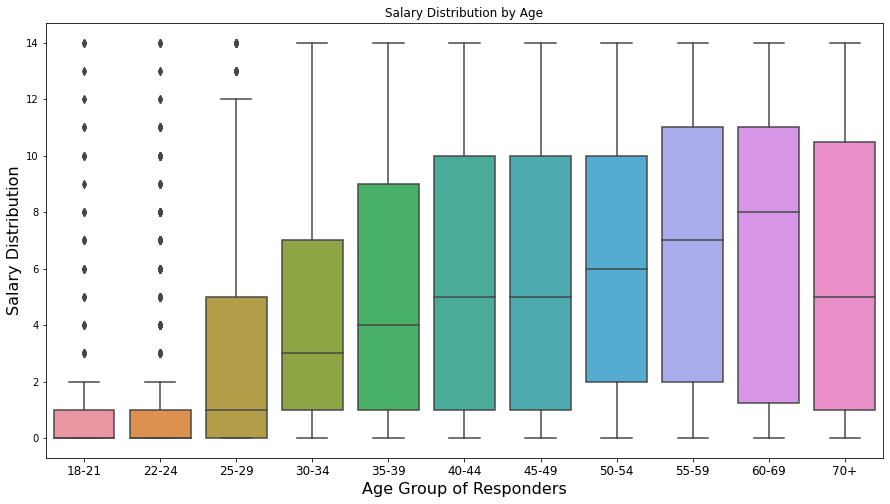

In [ ]:
## for age group salary distribution
import seaborn as sns
plt.figure(figsize=(15,8))

ax = sns.boxplot(y='salaryencode', x='age', data=df.sort_values(by=['age']))

ax.set_xticklabels(ax.get_xticklabels(),rotation=90,fontsize=12)
ax.set_title("Salary Distribution by Age")
ax.set_xlabel("Age Group of Responders",fontsize=16)
ax.set_ylabel("Salary Distribution",fontsize=16)
plt.xticks(rotation = 'horizontal')
plt.show()



It is evident from the plot that as age increases, the salary variation and the median salary also increases.  Also, the variation increases with age with highest variation in salary being at 70+ age

### Analyzing difference about salary between male and female group.

In [ ]:
df['country'].replace(  {'United States of America':'United States',
                        'Viet Nam':'Vietnam',
                         "People 's Republic of China":'China',
                         "United Kingdom of Great Britain and Northern Ireland":'United Kingdom',
                         "Hong Kong (S.A.R.)":"Hong Kong"},inplace=True)


# Splitting all the datasets genderwise
male_2019 = df[df['gender']=='Male']
female_2019 = df[df['gender']=='Female']


# Top-10 Countries with Respondents in 2019
topn = 10
count_male = male_2019['country'].value_counts()[:topn].reset_index()
count_female = female_2019['country'].value_counts()[:topn].reset_index()


In [ ]:
count_male

,index,country
0,India,2110
1,United States,1710
2,Other,576
3,Brazil,478
4,Japan,436
5,Russia,369
6,Germany,298
7,United Kingdom,272
8,Spain,268
9,France,240


In [ ]:
count_female

,index,country
0,United States,383
1,India,344
2,Other,100
3,Canada,70
4,Germany,54
5,Brazil,54
6,Russia,53
7,United Kingdom,52
8,Spain,43
9,Japan,38


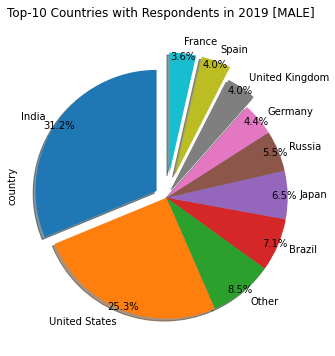

In [ ]:
explode_list = [0.1, 0, 0, 0, 0,0,0,0.1,0.2,0.2]
count_male['country'].plot(kind='pie',
                            figsize=(5, 6),
                            autopct='%1.1f%%', # add in percentages
                            startangle=90,     # start angle 90° 
                            shadow=True,
                             pctdistance=0.97, explode=explode_list ,
                             labels=count_male['index'],
                           
                            )

plt.title('Top-10 Countries with Respondents in 2019 [MALE]')
plt.axis('equal') # Sets the pie chart to look like a circle.

plt.show()

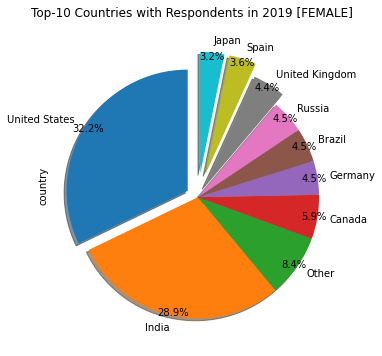

In [ ]:
explode_list = [0.1, 0, 0, 0, 0,0,0,0.1,0.2,0.2]
count_female['country'].plot(kind='pie',
                            figsize=(5, 6),
                            autopct='%1.1f%%', # add in percentages
                            startangle=90,     # start angle 90° 
                            shadow=True,
                             pctdistance=0.97, explode=explode_list ,
                             labels=count_female['index'],
                           
                            )

plt.title('Top-10 Countries with Respondents in 2019 [FEMALE]')
plt.axis('equal') # Sets the pie chart to look like a circle.

plt.show()

In [ ]:
df.dtypes

0
age                                                                                                         object
gender                                                                                                      object
country                                                                                                     object
education                                                                                                   object
jobrole                                                                                                     object
sizeofemploy                                                                                                object
Approximately how many individuals are responsible for data science workloads at your place of business?    object
Does your current employer incorporate machine learning methods into their business?                        object
salaryencode                                                                  

### Average salary across the country using salaryencoded ratio

In [ ]:
df1=df[['country','salaryencode']]

In [ ]:
df1=df[['country','salaryencode']]
df1.head()

,country,salaryencode
0,France,3
1,India,0
2,Australia,14
3,India,0
4,France,6


In [ ]:
df_country = df1.groupby('country', axis=0).sum()

In [ ]:
df_country.sort_values(by='salaryencode',ascending=False)
df_sal=df_country.nlargest(5,'salaryencode')


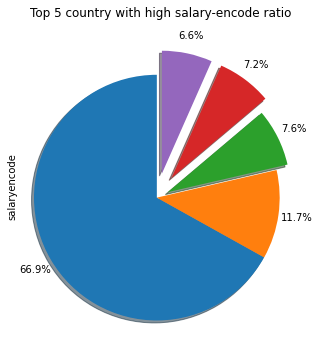

In [ ]:
explode_list = [0,0,0.1,0.2,0.2]
df_sal['salaryencode'].plot(kind='pie',
                            figsize=(5, 6),
                            autopct='%1.1f%%', # add in percentages
                            startangle=90,     # start angle 90° (Africa)
                            shadow=True,
                             pctdistance=1.15,
                            labels=None,
                            explode=explode_list 
                           # add shadow      
                            )

plt.title('Top 5 country with high salary-encode ratio')
plt.axis('equal') # Sets the pie chart to look like a circle.

plt.show()

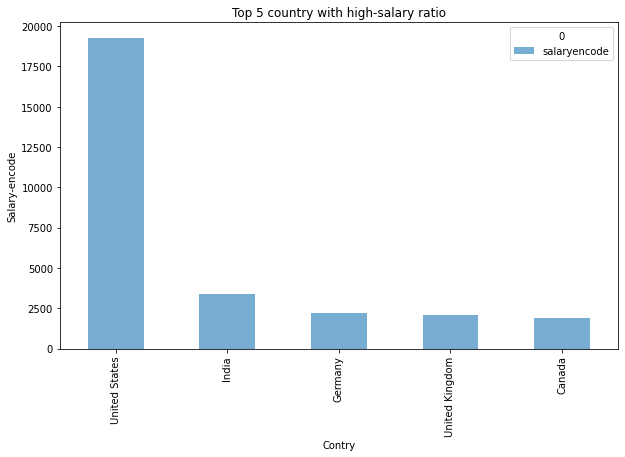

In [ ]:
df_sal.plot(kind='bar', figsize=(10, 6),alpha=0.6)
plt.title('Top 5 country with high-salary ratio')
plt.ylabel('Salary-encode')
plt.xlabel('Contry')
plt.show()

**This graphs display that United states have the highest salary ratio folllowed by India**

# Task-2 Feature Selection

In [ ]:
# df.drop(['salaryencode'], inplace=True, axis=1)
df.head()

,age,gender,country,education,jobrole,sizeofemploy,Approximately how many individuals are responsible for data science workloads at your place of business?,Does your current employer incorporate machine learning methods into their business?,salaryencode,buckets
0,22-24,Male,France,Master’s degree,Software Engineer,"1000-9,999 employees",0,I do not know,3,"30,000-39,999"
1,40-44,Male,India,Professional degree,Software Engineer,"> 10,000 employees",20+,"We have well established ML methods (i.e., mod...",0,"0-9,999"
2,40-44,Male,Australia,Master’s degree,Other,"> 10,000 employees",20+,I do not know,14,">250,000"
3,22-24,Male,India,Bachelor’s degree,Other,0-49 employees,0,No (we do not use ML methods),0,"0-9,999"
4,50-54,Male,France,Master’s degree,Data Scientist,0-49 employees,3-4,"We have well established ML methods (i.e., mod...",6,"60,000-69,999"


**Target grouping to create a balance with the  number of datapoints in each set** 

In [ ]:
df['buckets_comb'] = None

for idx, val in enumerate(df.salaryencode):

    if val == 0:
        df['buckets_comb'][idx] = '0-10K'
    elif val >=1 and val <= 2:
        df['buckets_comb'][idx] = '10K-30K'
    elif val >=3 and val <= 5:
        df['buckets_comb'][idx] = '30K-60K'
    elif val >=6 and val <= 8:
        df['buckets_comb'][idx] = '60K-90K'
    elif val >=9 and val <= 11:
        df['buckets_comb'][idx] = '90K-150K'
    else:
        df['buckets_comb'][idx] = '150K+'

In [ ]:
df['buckets_comb_float'] = None

for idx, val in enumerate(df.salaryencode):

    if val == 0:
        df['buckets_comb_float'][idx] = 0
    elif val >=1 and val <= 2:
        df['buckets_comb_float'][idx] = 1
    elif val >=3 and val <= 5:
        df['buckets_comb_float'][idx] = 2
    elif val >=6 and val <= 8:
        df['buckets_comb_float'][idx] = 3
    elif val >=9 and val <= 11:
        df['buckets_comb_float'][idx] = 4
    else:
        df['buckets_comb_float'][idx] = 5

In [ ]:
df.head()

,age,gender,country,education,jobrole,sizeofemploy,Approximately how many individuals are responsible for data science workloads at your place of business?,Does your current employer incorporate machine learning methods into their business?,salaryencode,buckets,buckets_comb,buckets_comb_float
0,22-24,Male,France,Master’s degree,Software Engineer,"1000-9,999 employees",0,I do not know,3,"30,000-39,999",30K-60K,2
1,40-44,Male,India,Professional degree,Software Engineer,"> 10,000 employees",20+,"We have well established ML methods (i.e., mod...",0,"0-9,999",0-10K,0
2,40-44,Male,Australia,Master’s degree,Other,"> 10,000 employees",20+,I do not know,14,">250,000",150K+,5
3,22-24,Male,India,Bachelor’s degree,Other,0-49 employees,0,No (we do not use ML methods),0,"0-9,999",0-10K,0
4,50-54,Male,France,Master’s degree,Data Scientist,0-49 employees,3-4,"We have well established ML methods (i.e., mod...",6,"60,000-69,999",60K-90K,3


In [ ]:
X = df.drop(columns=['salaryencode', 'buckets', 'buckets_comb', 'buckets_comb_float'])
X.head()

,age,gender,country,education,jobrole,sizeofemploy,Approximately how many individuals are responsible for data science workloads at your place of business?,Does your current employer incorporate machine learning methods into their business?
0,22-24,Male,France,Master’s degree,Software Engineer,"1000-9,999 employees",0,I do not know
1,40-44,Male,India,Professional degree,Software Engineer,"> 10,000 employees",20+,"We have well established ML methods (i.e., mod..."
2,40-44,Male,Australia,Master’s degree,Other,"> 10,000 employees",20+,I do not know
3,22-24,Male,India,Bachelor’s degree,Other,0-49 employees,0,No (we do not use ML methods)
4,50-54,Male,France,Master’s degree,Data Scientist,0-49 employees,3-4,"We have well established ML methods (i.e., mod..."


##  **One Hot Coding:**
One hot coding is a binary style coding used for converting categorical data into numerical data. 

Label encoding has a disadvantage of naturally assigning higher weights in sequence. So it might be a problem when interpreting the algorithm that it has some sort of precedence or more/less importance based on the number assigned.

To overcome this, One hot encoding uses a binary styles coding where each column is made for a unique row value and forms a matrix structure where 1 ia assigned only to the element where row and column value matches and the rest are assigned 0. this way the balance is maintained



In [ ]:
#getting the dummy matrix using one hot coding
X = pd.get_dummies(X, drop_first=True)
X.head()

,age_22-24,age_25-29,age_30-34,age_35-39,age_40-44,age_45-49,age_50-54,age_55-59,age_60-69,age_70+,gender_Male,gender_Prefer not to say,gender_Prefer to self-describe,country_Argentina,country_Australia,country_Austria,country_Bangladesh,country_Belarus,country_Belgium,country_Brazil,country_Canada,country_Chile,country_China,country_Colombia,country_Czech Republic,country_Denmark,country_Egypt,country_France,country_Germany,country_Greece,country_Hong Kong,country_Hungary,country_India,country_Indonesia,"country_Iran, Islamic Republic of...",country_Ireland,country_Israel,country_Italy,country_Japan,country_Kenya,...,country_Sweden,country_Switzerland,country_Taiwan,country_Thailand,country_Tunisia,country_Turkey,country_Ukraine,country_United Kingdom,country_United States,country_Vietnam,education_Doctoral degree,education_I prefer not to answer,education_Master’s degree,education_No formal education past high school,education_Professional degree,education_Some college/university study without earning a bachelor’s degree,jobrole_DBA/Database Engineer,jobrole_Data Analyst,jobrole_Data Engineer,jobrole_Data Scientist,jobrole_Other,jobrole_Product/Project Manager,jobrole_Research Scientist,jobrole_Software Engineer,jobrole_Statistician,"sizeofemploy_1000-9,999 employees",sizeofemploy_250-999 employees,sizeofemploy_50-249 employees,"sizeofemploy_> 10,000 employees",Approximately how many individuals are responsible for data science workloads at your place of business?_1-2,Approximately how many individuals are responsible for data science workloads at your place of business?_10-14,Approximately how many individuals are responsible for data science workloads at your place of business?_15-19,Approximately how many individuals are responsible for data science workloads at your place of business?_20+,Approximately how many individuals are responsible for data science workloads at your place of business?_3-4,Approximately how many individuals are responsible for data science workloads at your place of business?_5-9,Does your current employer incorporate machine learning methods into their business?_No (we do not use ML methods),Does your current employer incorporate machine learning methods into their business?_We are exploring ML methods (and may one day put a model into production),"Does your current employer incorporate machine learning methods into their business?_We have well established ML methods (i.e., models in production for more than 2 years)","Does your current employer incorporate machine learning methods into their business?_We recently started using ML methods (i.e., models in production for less than 2 years)",Does your current employer incorporate machine learning methods into their business?_We use ML methods for generating insights (but do not put working models into production)
0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0
2,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0


In [ ]:
y = df['buckets_comb_float']
y.head()

0    2
1    0
2    5
3    0
4    3
Name: buckets_comb_float, dtype: object

## **Lasso Regression**

Regularization is a  technique of adding the penalty to the parameters in order to avoid overfitting. 

Lasso regression analysis is one such method that has the ability to shrink the coefficients to zero. This helps in reducing the unnncessary features from the model and thus reducing the proability of error.

Variales with the coefficients zero after the shrinkage are removed from the model and the one with non-zero coefficients represents that they contribute more towards the response variable.

In [ ]:
#Choose a random value of alpha
model_lasso = Lasso(alpha = 0.01, random_state=5).fit(X, y)  

# Using .coef_ attribute to give a correlation between the features
co_eff = pd.Series(model_lasso.coef_, index = X.columns)
print (co_eff.head())

# Eliminate the features whose correlation value is 0
print("\nIt selected " + str(sum(co_eff != 0)) + " variables and eliminated the rest " +  str(sum(co_eff == 0)) + " variables\n")


# Initializing SelectFromModel to easily select the features from our Lasso Model
sfm_sel = SelectFromModel(model_lasso)

# Training the selector on our feature and target data
sfm_sel.fit(X, y)


for feature_list_index in sfm_sel.get_support(indices=True):
    print(X.columns[feature_list_index])

# new feature data with selected features stored here
X_selected=X[X.columns[(sfm_sel.get_support())]]

age_22-24   -0.761631
age_25-29   -0.414852
age_30-34   -0.000000
age_35-39    0.088731
age_40-44    0.225378
dtype: float64

It selected 36 variables and eliminated the rest 65 variables

age_22-24
age_25-29
age_35-39
age_40-44
age_45-49
age_50-54
age_55-59
gender_Male
country_Australia
country_Brazil
country_Canada
country_France
country_Germany
country_India
country_Nigeria
country_Other
country_Russia
country_United Kingdom
country_United States
education_Doctoral degree
education_Master’s degree
jobrole_Data Analyst
jobrole_Data Scientist
jobrole_Product/Project Manager
jobrole_Research Scientist
sizeofemploy_1000-9,999 employees
sizeofemploy_250-999 employees
sizeofemploy_50-249 employees
sizeofemploy_> 10,000 employees
Approximately how many individuals are responsible for data science workloads at your place of business?_1-2
Approximately how many individuals are responsible for data science workloads at your place of business?_20+
Approximately how many individuals are respons

In [ ]:
#list of the removed features
removed_feats = X.columns[(sfm_sel.estimator_.coef_ == 0).ravel().tolist()]
removed_feats

Index(['age_30-34', 'age_60-69', 'age_70+', 'gender_Prefer not to say',
       'gender_Prefer to self-describe', 'country_Argentina',
       'country_Austria', 'country_Bangladesh', 'country_Belarus',
       'country_Belgium', 'country_Chile', 'country_China', 'country_Colombia',
       'country_Czech Republic', 'country_Denmark', 'country_Egypt',
       'country_Greece', 'country_Hong Kong', 'country_Hungary',
       'country_Indonesia', 'country_Iran, Islamic Republic of...',
       'country_Ireland', 'country_Israel', 'country_Italy', 'country_Japan',
       'country_Kenya', 'country_Malaysia', 'country_Mexico',
       'country_Morocco', 'country_Netherlands', 'country_New Zealand',
       'country_Norway', 'country_Pakistan', 'country_Peru',
       'country_Philippines', 'country_Poland', 'country_Portugal',
       'country_Republic of Korea', 'country_Romania', 'country_Saudi Arabia',
       'country_Singapore', 'country_South Africa', 'country_South Korea',
       'country_Spain'

## **PCA working**

PCA is an unsupervised dimensionality reduction feature. It basically helps when the dataset has a large number of features and might lead to overfitting. PCA helps in projecting each data points only to the principal components that contributes towards the more variation in the dataset. 

It is an orthogonal transformation method which convert a set of observations of possibly correlated variables into a set of values of linearly uncorrelated variables called principal components.

Scaling The Independent Data Set:
We transform (centralize) the entire X (independent variable data) to normalize it using standardscalar(), through transformation. It helps to bring all our features to same scale so that each one of them has at the time of feature analysis using PCA.

In [ ]:
from sklearn.preprocessing import StandardScaler
# on this distribution. 
sc = StandardScaler()
X_std =  sc.fit_transform(X)

In [ ]:
pca = PCA(n_components=0.99,random_state=0)
X_pca = pca.fit_transform(X_selected)
X_pca

array([[-0.11753205, -0.39982646, -0.17455675, ...,  0.68198945,
         0.22231974, -0.49109811],
       [ 1.13359509,  0.60819205, -0.76576469, ...,  0.01537692,
         0.0732798 ,  0.02529332],
       [ 0.85415249, -0.20955802, -0.71702535, ...,  0.09719302,
        -0.02957468,  0.51826119],
       ...,
       [-0.31692116,  0.31839347, -0.28112326, ...,  0.02934065,
        -0.12715971, -0.07542637],
       [-0.22564484, -0.85618674,  0.07536553, ..., -0.02302152,
         0.0269433 ,  0.01736847],
       [ 1.06149042,  0.6132882 , -0.55182261, ...,  0.7403075 ,
         0.35888286, -0.42225505]])

In [ ]:
X_pca.shape

(12497, 34)

Text(0, 0.5, 'Cumulative Explained Variance')

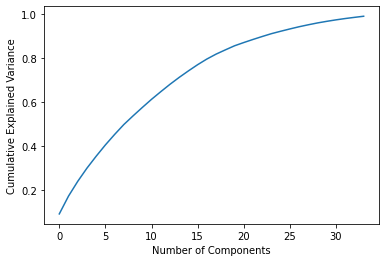

In [ ]:
# We plot explained variance vs number of components to show the reason of choosing 99% as explained variance

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

In [ ]:
X = X_pca
X

array([[-0.11753205, -0.39982646, -0.17455675, ...,  0.68198945,
         0.22231974, -0.49109811],
       [ 1.13359509,  0.60819205, -0.76576469, ...,  0.01537692,
         0.0732798 ,  0.02529332],
       [ 0.85415249, -0.20955802, -0.71702535, ...,  0.09719302,
        -0.02957468,  0.51826119],
       ...,
       [-0.31692116,  0.31839347, -0.28112326, ...,  0.02934065,
        -0.12715971, -0.07542637],
       [-0.22564484, -0.85618674,  0.07536553, ..., -0.02302152,
         0.0269433 ,  0.01736847],
       [ 1.06149042,  0.6132882 , -0.55182261, ...,  0.7403075 ,
         0.35888286, -0.42225505]])

In [ ]:
df.head()

,age,gender,country,education,jobrole,sizeofemploy,Approximately how many individuals are responsible for data science workloads at your place of business?,Does your current employer incorporate machine learning methods into their business?,salaryencode,buckets,buckets_comb,buckets_comb_float
0,22-24,Male,France,Master’s degree,Software Engineer,"1000-9,999 employees",0,I do not know,3,"30,000-39,999",30K-60K,2
1,40-44,Male,India,Professional degree,Software Engineer,"> 10,000 employees",20+,"We have well established ML methods (i.e., mod...",0,"0-9,999",0-10K,0
2,40-44,Male,Australia,Master’s degree,Other,"> 10,000 employees",20+,I do not know,14,">250,000",150K+,5
3,22-24,Male,India,Bachelor’s degree,Other,0-49 employees,0,No (we do not use ML methods),0,"0-9,999",0-10K,0
4,50-54,Male,France,Master’s degree,Data Scientist,0-49 employees,3-4,"We have well established ML methods (i.e., mod...",6,"60,000-69,999",60K-90K,3


# Task-3 Model Implementation

We have built models and made predictions of salary prices. Now we will determine how accurate these predictions are. 

<h1 id="1">Part 1: Training and Splitting</h1>

<p>An important step in testing your model is to split your data into training and testing data. We will place the target data <b>salary</b> in a separate dataframe <b>y_data</b>:</p>


Now we randomly split our data into training and testing data  using the function <b>train_test_split</b>.

In [ ]:
import random 
from sklearn import metrics
from sklearn.model_selection import train_test_split, KFold, learning_curve, GridSearchCV, train_test_split,cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, log_loss, precision_score, recall_score
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.pipeline import Pipeline

from tqdm import tqdm

import matplotlib.pyplot as plt
import seaborn as sn

import warnings

sn.set_style('whitegrid')

here we split data into 70-30 ratio 

70% --->training set
30% --->test set

In [ ]:
y=y.astype('int')

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [ ]:
kfold = KFold(n_splits=10,random_state=5)  # Using 10 folds for cross-validation
kfold.get_n_splits(X_train)

# Initializing empty arrays to store values from kfold validations
accuracy_test = np.zeros(10)
accuracy_train = np.zeros(10)
recall=np.zeros(10)
precision=np.zeros(10)
f1_score=np.zeros(10)

trainErr2=np.zeros(10)
testErr2=np.zeros(10)

np_idx = 0   # Index value to store value at

Y_train=np.array(Y_train)

# Initializing LogisticRegression function with some set parameters

LR = LogisticRegression(multi_class='ovr', solver='liblinear',penalty='l1',C=1,max_iter=500)

# Running loop here to run validations
for train_idx, test_idx in kfold.split(X_train):
    
    # Dividing X_train_split into further training and testing for each validation
    x_train, x_test = X_train[train_idx], X_train[test_idx] 
    
    # Dividing y_train_split into further training and testing for each validation
    y_train, y_test = Y_train[train_idx], Y_train[test_idx] 
    
#     print(x_train, y_train)

    LR.fit(x_train, y_train) # Fitting the model in training dataset divided above

    # predict function gives the exact class a particular datapoint belongs to (required for calculating accuracy and related metrics)
    predictions_test_predicted = LR.predict(x_test)  # predicting for test part
    predictions_train_predicted = LR.predict(x_train)  # predicting for train part

    # Computing the confusion matrix
    CM=confusion_matrix(y_test, predictions_test_predicted)

    ACC_test=accuracy_score(y_test,predictions_test_predicted)  # Computing accuracy of testing dataset
    ACC_train=accuracy_score(y_train,predictions_train_predicted)   # Computing accuracy of training dataset

    accuracy_test[np_idx] = ACC_test*100               # Storing testing accuracy in the array
    accuracy_train[np_idx] = ACC_train*100             # Storing training accuracy in the array
    
    recall[np_idx] = recall_score(y_test, predictions_test_predicted, average='macro')  # Computing recall value
    
    precision[np_idx] = precision_score(y_test, predictions_test_predicted, average='macro')   # Computing precision value
    
    f1_score[np_idx]=2*precision[np_idx]*recall[np_idx]/(precision[np_idx]+recall[np_idx])   # Computing f1-score

    np_idx += 1
    
    # Print Accuracy at each fold for both Test and Train Data
    print ("For Train Data: Fold {}: Accuracy: {}%".format(np_idx, round(ACC_train*100,3)))  
    print ("For Test Data: Fold {}: Accuracy: {}%".format(np_idx, round(ACC_test*100,3)))   
    

    
## For the given set of hyper-parameters, we print the average test and training accuracy 
## as well as other metrics such as Precison, Recall and F1-Score

print ("\nAverage Test Score: {}%({}%)".format(round(np.mean(accuracy_test),3),round(np.std(accuracy_test),3)))

print ("\nAverage Train Score: {}%({}%)".format(round(np.mean(accuracy_train),3),round(np.std(accuracy_train),3)))

print ("\nAverage Precision: {}%({}%)".format(round(np.mean(precision)*100,3),round(np.std(precision),3)))

print ("\nAverage Recall: {}%({}%)".format(round(np.mean(recall)*100,3),round(np.std(recall),3)))

print ("\nAverage F1 Score: {}%({}%)".format(round(np.mean(f1_score)*100,3),round(np.std(f1_score),3)))

For Train Data: Fold 1: Accuracy: 44.83%
For Test Data: Fold 1: Accuracy: 44.0%
For Train Data: Fold 2: Accuracy: 44.334%
For Test Data: Fold 2: Accuracy: 45.6%
For Train Data: Fold 3: Accuracy: 44.576%
For Test Data: Fold 3: Accuracy: 43.657%
For Train Data: Fold 4: Accuracy: 44.842%
For Test Data: Fold 4: Accuracy: 40.914%
For Train Data: Fold 5: Accuracy: 44.588%
For Test Data: Fold 5: Accuracy: 44.686%
For Train Data: Fold 6: Accuracy: 44.22%
For Test Data: Fold 6: Accuracy: 45.486%
For Train Data: Fold 7: Accuracy: 44.499%
For Test Data: Fold 7: Accuracy: 43.543%
For Train Data: Fold 8: Accuracy: 44.405%
For Test Data: Fold 8: Accuracy: 43.249%
For Train Data: Fold 9: Accuracy: 44.875%
For Test Data: Fold 9: Accuracy: 42.105%
For Train Data: Fold 10: Accuracy: 44.316%
For Test Data: Fold 10: Accuracy: 44.622%

Average Test Score: 43.786%(1.385%)

Average Train Score: 44.549%(0.225%)

Average Precision: 42.324%(0.024%)

Average Recall: 34.869%(0.013%)

Average F1 Score: 38.224%(0.0

##Learning Curve

In [ ]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=1,\
                        train_sizes=np.linspace(.1, 1.0, 5), scoring='accuracy'):
    
    plt.figure(figsize=(10,6))
    plt.title(title)
    
    if ylim is not None:
        plt.ylim(*ylim)
        
    plt.xlabel("Training examples")
    plt.ylabel(scoring)
    
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, scoring=scoring, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,\
                     train_scores_mean + train_scores_std, alpha=0.1, \
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,\
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    plt.legend(loc="best")
    plt.show()
    
    return plt

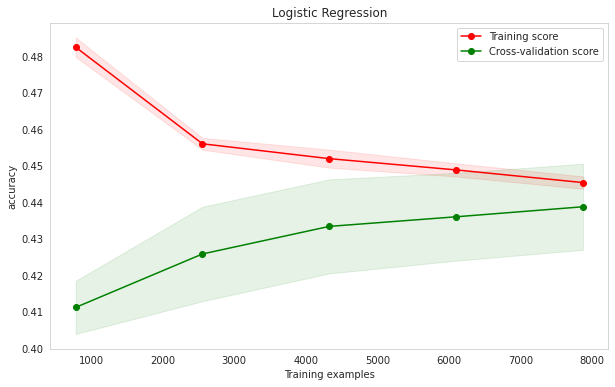

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

In [ ]:
plot_learning_curve(LR,'Logistic Regression', X_train, Y_train, cv=10)

Learning Curve show relationship between test accuaracy and train accuracy .So we can easily compare model's performance on both split data using learning curve.

Also we can see bias-variance tradeoff using learning curve.

**Types of learning curves**

-->Bad Learning Curve: High Bias

    When training and testing errors converge and are high
    No matter how much data we feed the model, the model cannot represent the underlying relationship and has high systematic errors

    -Poor fit

    -Poor generalization

-->Bad Learning Curve: High Variance

    -When there is a large gap between the errors
    -Require data to improve
    -Can simplify the model with fewer or less complex features


-->Ideal Learning Curve

    -Model that generalizes to new data
    -Testing and training learning curves converge at similar values
    -Smaller the gap, the better our model generalizes

In [ ]:
#get model accuracy on training dataset
LR.score(X_train,Y_train)

0.44346633131359325

from upper cell we can easily see that our model give 44.3% accuracy on training data set.

In [ ]:
#here we only predict for x_test data
yhat = LR.predict(X_test)
yhat

array([1, 0, 0, ..., 1, 4, 0])

Conclusion:

Using 10-fold cross validation , we get

Our model's Performance:

Average Test Score: 43.786%(1.385%)

Average Train Score: 44.55%(0.225%)

So we can say that our model fit quite well on both dataset


# Task: 4 Model Tuning

`Choosing an optimal model for a given task(comparing multiple classifier on a specific domain) requires selecting performance measures, for example accuracy, precision, recall and F1-score to compare the model performance`

In [ ]:
#here we only predict for x_test data
yhat = LR.predict(X_test)
yhat

array([1, 0, 0, ..., 1, 4, 0])

In [ ]:
#we get probabality of salary of x_test
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.30928129, 0.40120307, 0.12367819, 0.07025958, 0.05771129,
        0.03786659],
       [0.35266695, 0.23412176, 0.20569632, 0.11205372, 0.06249629,
        0.03296496],
       [0.64590374, 0.26894375, 0.05386912, 0.02168509, 0.00337712,
        0.00622118],
       ...,
       [0.39458224, 0.40174575, 0.16647747, 0.02638679, 0.00942068,
        0.00138707],
       [0.14335884, 0.01389391, 0.06907441, 0.24243483, 0.37505223,
        0.15618578],
       [0.27786503, 0.15527144, 0.27462652, 0.20738314, 0.08010383,
        0.00475005]])

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
#from this function we get precision,recall,f1-score and support
print (classification_report(Y_test, yhat))

              precision    recall  f1-score   support

           0       0.51      0.81      0.62      1212
           1       0.30      0.15      0.20       711
           2       0.31      0.30      0.30       646
           3       0.41      0.15      0.22       452
           4       0.40      0.48      0.44       483
           5       0.45      0.13      0.20       246

    accuracy                           0.43      3750
   macro avg       0.40      0.34      0.33      3750
weighted avg       0.40      0.43      0.39      3750



`Treating each value of hyperparameters as a new model`

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
Pca=PCA()

Log_Reg=LogisticRegression(multi_class='ovr',max_iter=200,penalty='l2')

steps = [('PCA', Pca), ('Log_Reg', Log_Reg)]

pipeline = Pipeline(steps)

parameters = {'PCA__n_components': [0.9, 0.95, 0.99], 'Log_Reg__C' : [0.1,0.5,1,10,25,50,100] , 'Log_Reg__solver' : ['newton-cg','lbfgs','sag','saga']}

CV = GridSearchCV(pipeline, parameters, cv=10, n_jobs= -1, verbose=True)
CV.fit(X_train, Y_train)  

print('Best score and parameter combination = ')

print(CV.best_score_)    
print(CV.best_params_)

Fitting 10 folds for each of 84 candidates, totalling 840 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    8.9s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   40.0s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 840 out of 840 | elapsed:  3.7min finished


Best score and parameter combination = 
0.43671853546910755
{'Log_Reg__C': 25, 'Log_Reg__solver': 'newton-cg', 'PCA__n_components': 0.99}


In [ ]:
#warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore")

LR_model_tuned = LogisticRegression(multi_class='multinomial')
scaler_tuned = StandardScaler()

best_model = LR_model_tuned
best_params = {}
best_accuracy = 0
best_std = 0
best_precision = 0
best_recall = 0
best_f1_score = 0

# Declaring empty arrays to store respective values for each set of hyper-parameters

trainErr_loop=np.zeros(40)  # For storing training error
testErr_loop=np.zeros(40)  # For storing testing error

accuracy = np.zeros(40)  # For storing accuracy
recall = np.zeros(40)  # For storing recall
precision = np.zeros(40)  # For storing precision
f1_score = np.zeros(40)  # For storing f1-score

np_idx=0

Y_train=np.array(Y_train)

## For below values of C and solvers in Logistic Regression, we will run the CV loop and find the best model and hyper-parameters

for C in [0.001,0.01,0.05,0.1,0.5,1,5,10,100,1000]:
    for solver in ['newton-cg','lbfgs','sag','saga']:
        
        # # Declaring empty arrays to store respective values for each run of CV
        
        LR_model_tuned = LogisticRegression(multi_class='multinomial',C=C, solver=solver,max_iter=1000)
        
        X2_train, X2_test, y2_train, y2_test = train_test_split(X_train, Y_train, test_size=0.3, random_state=1)
        
        LR_model_tuned.fit(X2_train, y2_train)
            
            # predict function gives the exact class a particular datapoint belongs to (required for calculating accuracy and related metrics)                                    
        predictions_tr = LR_model_tuned.predict(X2_train)  
        predictions_tst = LR_model_tuned.predict(X2_test)   
            
            # predict function gives the probability of the datapoint belonging to each class (required for calculating log-loss)                                
        predictions_tr_err = LR_model_tuned.predict_proba(X2_train)
        predictions_tst_err = LR_model_tuned.predict_proba(X2_test)   

        CM=confusion_matrix(y2_test, predictions_tst)  # Computing confusion matrix
    
        ACC=accuracy_score(y2_test, predictions_tst)  # Computing accuracy using accuracy_score function
         
        recall[np_idx] = recall_score(y2_test, predictions_tst, average='macro')  # Computing recall value using recall_score function
    
        precision[np_idx] = precision_score(y2_test, predictions_tst, average='macro')   # Computing precision value using precision_score function

        f1_score[np_idx]=2*precision[np_idx]*recall[np_idx]/(precision[np_idx]+recall[np_idx])  # Computing f1 score
        
        accuracy[np_idx] = ACC*100
            
        trainErr_loop[np_idx] = np.mean(log_loss(y2_train, predictions_tr_err))  # Computing mean of log loss of training datset
        testErr_loop[np_idx] = np.mean(log_loss(y2_test, predictions_tst_err))  # Computing mean of log loss of testing datset
        
        ## Here we check for best accuracy and store the model type and parameters if it exceeds the previous value                                    
        if accuracy.max() >= best_accuracy:
            best_model = LR_model_tuned
            best_params = {'C':C, 'solver':solver}
            best_accuracy = accuracy[np_idx]
            best_precision = precision[np_idx]
            best_recall = recall[np_idx]
            best_f1_score = f1_score

        np_idx += 1   
        
print (best_params)
                                            
print ("\nBest Accuracy: {}%({}%)".format(round(best_accuracy,3),round(best_std,3)))      

print ("\nThe optimal log model uses C={}, and a {} solver, and has a cross validation score of {}% with a standard deviation of {}%".format(best_params['C'],best_params['solver'],round(best_accuracy,3),round(best_std,3)))




{'C': 1000, 'solver': 'saga'}

Best Accuracy: 44.495%(0%)

The optimal log model uses C=1000, and a saga solver, and has a cross validation score of 44.495% with a standard deviation of 0%


In [ ]:
print ("\nBest Precision: {}%".format(round((best_precision)*100,3)))
print ("\nBest Recall: {}%".format(round((best_recall)*100,3)))





Best Precision: 41.297%

Best Recall: 37.428%


In [ ]:
## Creating a matrix for training and testing error for each set of hyper-parameter

index = [0.001,0.01,0.05,0.1,0.5,1,5,10,100,1000]
columns = ['newton-cg','lbfgs','sag','saga']

testErr_loop=pd.DataFrame(testErr_loop,index = index, columns=columns)
trainErr_loop=pd.DataFrame(trainErr_loop,index = index, columns=columns)
print(trainErr_loop,'\n',testErr_loop)

          newton-cg     lbfgs       sag      saga
0.001      1.591646  1.591646  1.591645  1.591645
0.010      1.415429  1.415428  1.415429  1.415430
0.050      1.340039  1.340037  1.340040  1.340039
0.100      1.325166  1.325165  1.325166  1.325166
0.500      1.312925  1.312924  1.312925  1.312925
1.000      1.311747  1.311748  1.311747  1.311747
5.000      1.310827  1.310829  1.310827  1.310828
10.000     1.310576  1.310578  1.310577  1.310578
100.000    1.310260  1.310257  1.310261  1.310261
1000.000   1.310250  1.310250  1.310250  1.310250 
           newton-cg     lbfgs       sag      saga
0.001      1.590332  1.590332  1.590331  1.590332
0.010      1.415040  1.415039  1.415038  1.415039
0.050      1.344342  1.344341  1.344341  1.344343
0.100      1.331397  1.331398  1.331397  1.331396
0.500      1.322070  1.322073  1.322071  1.322071
1.000      1.321542  1.321538  1.321542  1.321543
5.000      1.321341  1.321351  1.321336  1.321342
10.000     1.321199  1.321211  1.321197  1.32120

In [ ]:
print(trainErr_loop + testErr_loop)

          newton-cg     lbfgs       sag      saga
0.001      3.181978  3.181978  3.181976  3.181977
0.010      2.830470  2.830467  2.830467  2.830469
0.050      2.684381  2.684378  2.684380  2.684382
0.100      2.656563  2.656563  2.656562  2.656561
0.500      2.634995  2.634997  2.634996  2.634996
1.000      2.633288  2.633286  2.633289  2.633290
5.000      2.632168  2.632180  2.632163  2.632170
10.000     2.631775  2.631789  2.631774  2.631778
100.000    2.631238  2.631241  2.631237  2.631240
1000.000   2.631228  2.631221  2.631228  2.631229


##LOG-LOSS Error Functions

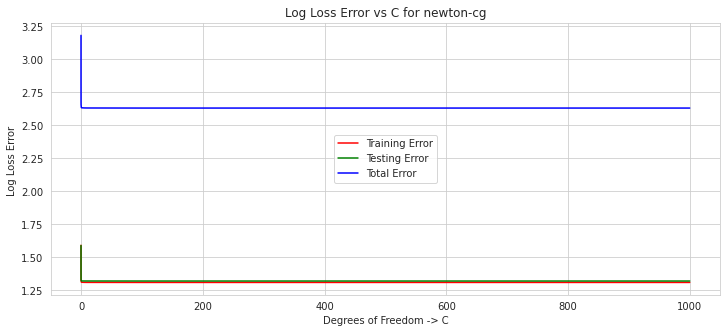

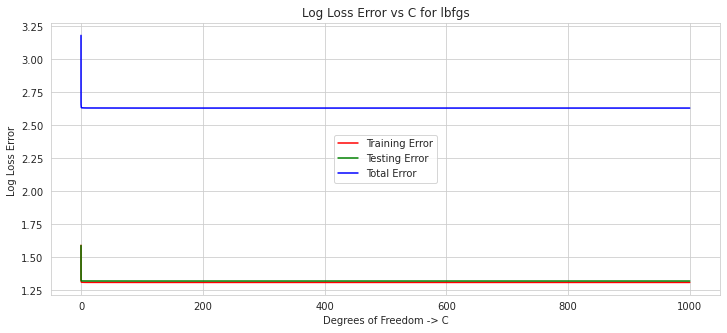

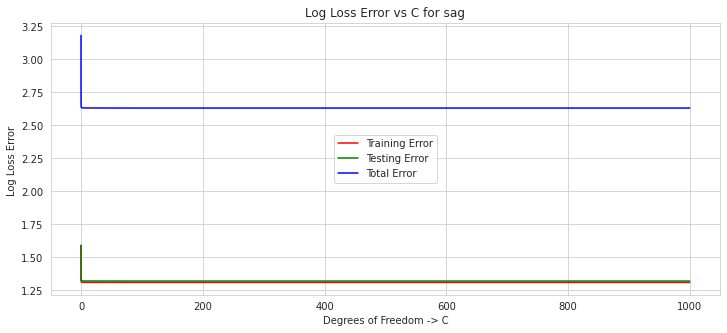

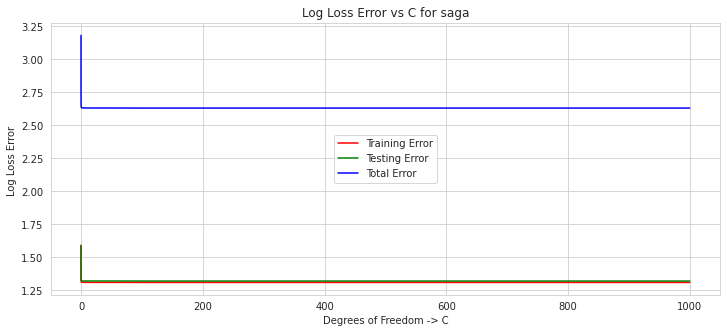

In [ ]:
## Plotting the curve of Log-Loss Error (both training and testing) vs values of C for a particular solver type

solver_type =['newton-cg','lbfgs','sag','saga']

for i in range(1,5):
    plt.figure(figsize=(12,5))
    plt.plot(trainErr_loop.iloc[:,i-1:i],'r',label='Training Error')
    plt.plot(testErr_loop.iloc[:,i-1:i],'g',label='Testing Error')
    plt.plot(trainErr_loop.iloc[:,i-1:i] + testErr_loop.iloc[:,i-1:i], 'b', label='Total Error')

    test_loss_min = testErr_loop.iloc[:,i-1:i].min()
    train_test_loss_min=(trainErr_loop.iloc[:,i-1:i] + testErr_loop.iloc[:,i-1:i]).min()

    deg_min = np.array(testErr_loop.iloc[:,i-1:i]).argmin()
    total_deg_min = np.array((trainErr_loop.iloc[:,i-1:i] + testErr_loop.iloc[:,i-1:i])).argmin()

    plt.title("Log Loss Error vs C for " + solver_type[i-1])
    plt.xlabel("Degrees of Freedom -> C")
    plt.ylabel("Log Loss Error ")
    plt.legend(loc=10)

**From** **the above graph we can say that training and test loss is almost same so we can say that our model learn pattern very well and model performance is good.**

**Now we fit model on the basis of tuning parameters**

In [ ]:
LR_Tun = LogisticRegression(multi_class='ovr',solver=CV.best_params_['Log_Reg__solver'],penalty='l2',C=CV.best_params_['Log_Reg__C'],max_iter=200)

In [ ]:
#again tuning model fit on training dataset
LR_Tun.fit(X_train,Y_train)

LogisticRegression(C=25, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=200,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
#performance of tuning model
LR_Tun.score(X_train,Y_train)

0.44518120498456615

In [ ]:
#here we only predict for x_test data basis of Tuning model
yhat_tun= LR_Tun.predict(X_test)
yhat_tun

array([1, 0, 0, ..., 1, 4, 0])

In [ ]:
#we get probabality of salary of x_test of tuning model
yhat_prob_tun = LR.predict_proba(X_test)
yhat_prob_tun

array([[0.30928129, 0.40120307, 0.12367819, 0.07025958, 0.05771129,
        0.03786659],
       [0.35266695, 0.23412176, 0.20569632, 0.11205372, 0.06249629,
        0.03296496],
       [0.64590374, 0.26894375, 0.05386912, 0.02168509, 0.00337712,
        0.00622118],
       ...,
       [0.39458224, 0.40174575, 0.16647747, 0.02638679, 0.00942068,
        0.00138707],
       [0.14335884, 0.01389391, 0.06907441, 0.24243483, 0.37505223,
        0.15618578],
       [0.27786503, 0.15527144, 0.27462652, 0.20738314, 0.08010383,
        0.00475005]])

In [ ]:
#from this function we get precision,recall,f1-score and support
print (classification_report(Y_test, yhat_tun))

              precision    recall  f1-score   support

           0       0.51      0.81      0.63      1212
           1       0.30      0.14      0.19       711
           2       0.31      0.29      0.30       646
           3       0.39      0.17      0.24       452
           4       0.40      0.47      0.43       483
           5       0.51      0.16      0.25       246

    accuracy                           0.43      3750
   macro avg       0.40      0.34      0.34      3750
weighted avg       0.41      0.43      0.39      3750



##observation:

    By Using Hypeparameters tunning,We find that Best score and parameter combination = 0.43614953698410885(44%) when 'Log_Reg__C'is 25, 'Log_Reg__solver'is 'newton-cg', 'PCA__n_components'is 0.99. After fit model on the basis of tuning parameters we are getting 45% accuracy.


#Task-5 Testing and Discussison

from uper cell we can see that in various methods , average loss is less so our model fit very well on data set

<h1 id="ref2"> Overfitting, Underfitting and Model Selection</h1>

<p>It turns out that the test data sometimes referred to as the out of sample data is a much better measure of how well your model performs in the real world. </p>


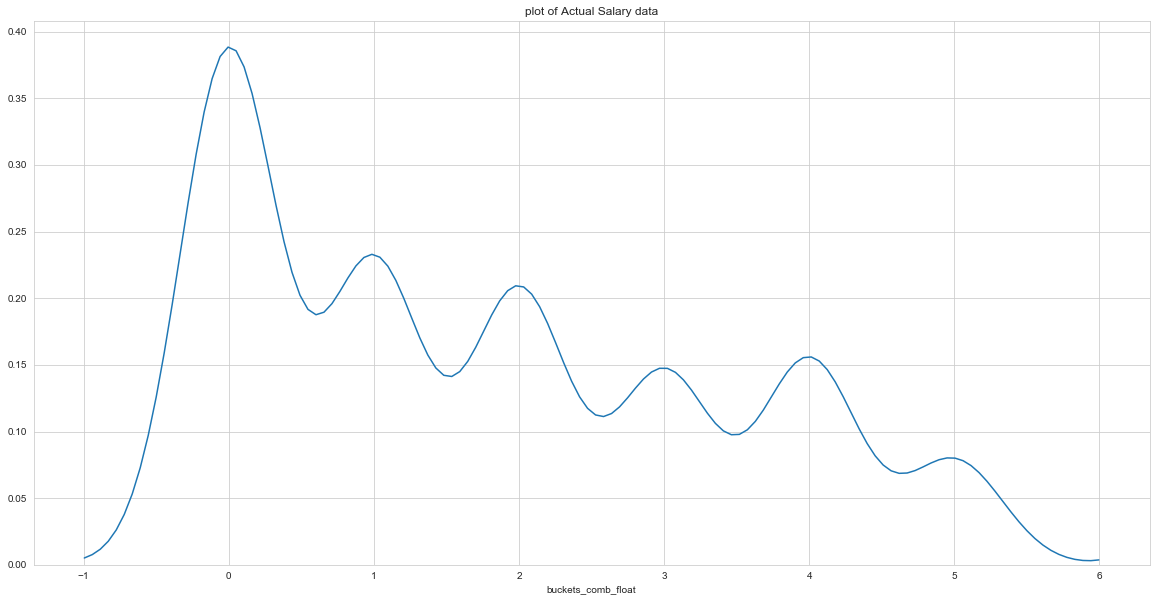

In [ ]:
#here we plot actual salary data
plt.figure(figsize=(20,10))
plt.title("plot of Actual Salary data")
sn.distplot(Y_test, hist=False)

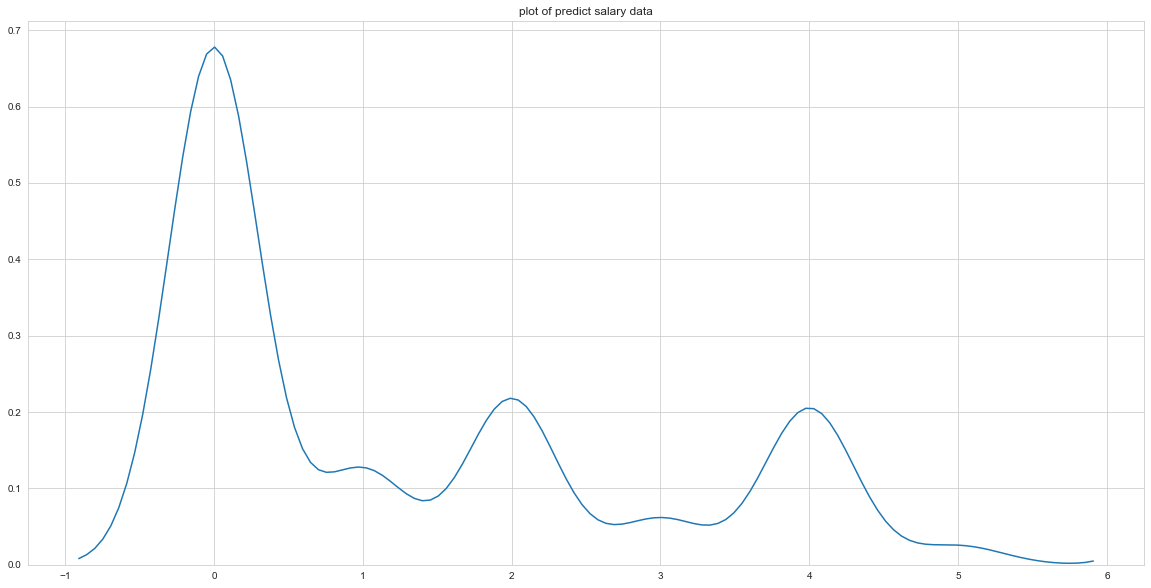

In [ ]:
#here we plot prediction of salary data
plt.figure(figsize=(20,10))
plt.title("plot of predict salary data")
sn.distplot(yhat, hist=False)

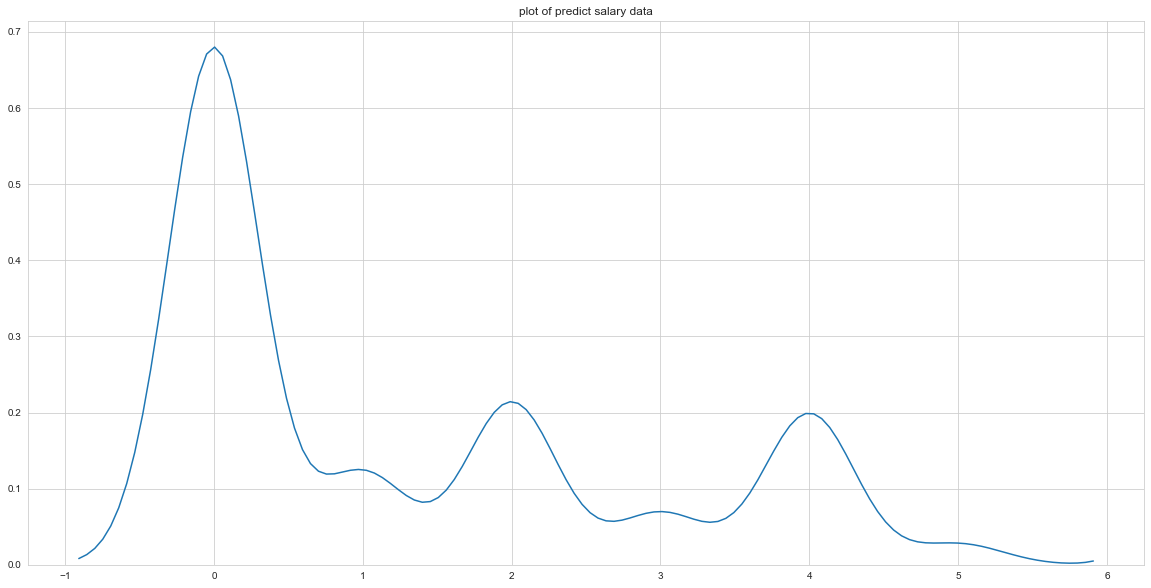

In [ ]:
#here we plot prediction of salary data of tun model performance
plt.figure(figsize=(20,10))
plt.title("plot of predict salary data")
sn.distplot(yhat_tun, hist=False)

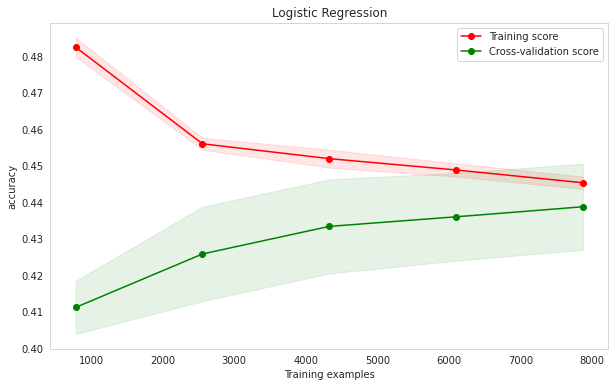

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

In [ ]:
plot_learning_curve(LR,'Logistic Regression', X_train, Y_train, cv=10)

##Conclusion:

    Our logistic model fit very well on training and testing dataset.It gives 45% accuracy on training dataset.And from above both graph we an also see that Graph of Prediction of Salary data is quiet similar graph of Actual salary data.We can say that our model fit well.

    In Model Implementation we use 10-fold cross validation. Before tunning, by logistic regression we are getting 0.44346633131359325(44.35%) accuracy and after tunning the model we are getting 0.44518120498456615(45%) accuracy. We can cleary see the there is minor difference in accuracy. We can cleary see this in above two graph.
    
    And From Both graph we can say that neighter our model is underfit nor overfit.

    By Implementing model tuning our model fit 45% means our model give 45% accuarate answer when c=25,solver='newton-cg' and PCA_n_components=0.99 means when there is 99& explained varience.

    Using Tun model we get 45% Accuracy on training data as well as test data.We can easily see in above graph that Tun model graph is as same as actual salary data graph.

    So In the End, we can say that model give performance well but then doing hyperparameters tuning it acts as cherry on top like it gives best performance.